Preprocessing

In [1]:
!pip install wordcloud 
!pip install gensim 
!pip install spacy
!pip install nltk
!python -m spacy download en_core_web_sm
!pip install --upgrade numpy
!pip install geopandas 
!pip install folium 
!pip install plotly 
!pip install matplotlib
!pip install pandas
!pip install seaborn

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   -------- ------------------------------- 5.2/24.4 MB 27.4 MB/s eta 0:00:01
   ------------------- -------------------- 11.8/24.4 MB 29.7 MB/s eta 0:00:01
   ------------------------------ --------- 18.6/24.4 MB 30.4 MB/s eta 0:00:01
   ---------------------------------------  23.9/24.4 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 24.4/24.4 MB 27.3 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------- ------------------- 1/2 [gensim]
   -------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.4 which is incompatible.


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ------------- -------------------------- 6.6/19.2 MB 30.8 MB/s eta 0:00:01
   -------------------------- ------------- 12.8/19.2 MB 31.4 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 31.4 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 29.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------  6.3/6.3 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 28.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 25.4 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ----------

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Load the dataset
file_path = r"C:\Users\gupta\OneDrive\Documents\EnvisionHackathon\final_dataset.xlsx" # Update if needed
hand_injuries_df = pd.read_excel(file_path)

**Text analysis (NLP) on the Incident Descriptions (Final Narrative)**

In [13]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords
import spacy
from collections import Counter

# Load necessary NLP models and stopwords
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Extract the Final Narrative column for analysis
narratives = hand_injuries_df['Final Narrative'].dropna()
# Preprocess text data
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    return ' '.join(tokens)
narratives = narratives.apply(preprocess)

Keyword Extraction (TF-IDF and N-grams) and Word Cloud for Most Frequent Words

Top Keywords from TF-IDF:
['amputate' 'amputation' 'arm' 'belt' 'blade' 'catch' 'cause' 'conveyor'
 'crush' 'cut' 'employee' 'employee left' 'employee operate'
 'employee right' 'employee use' 'fall' 'finger' 'finger catch'
 'fingertip' 'hand' 'index' 'index finger' 'left' 'left hand' 'left index'
 'machine' 'metal' 'middle' 'middle finger' 'move' 'operate' 'part'
 'piece' 'pinch' 'press' 'pull' 'remove' 'result' 'right' 'right hand'
 'right index' 'ring' 'ring finger' 'roller' 'saw' 'suffer' 'thumb' 'two'
 'use' 'work']


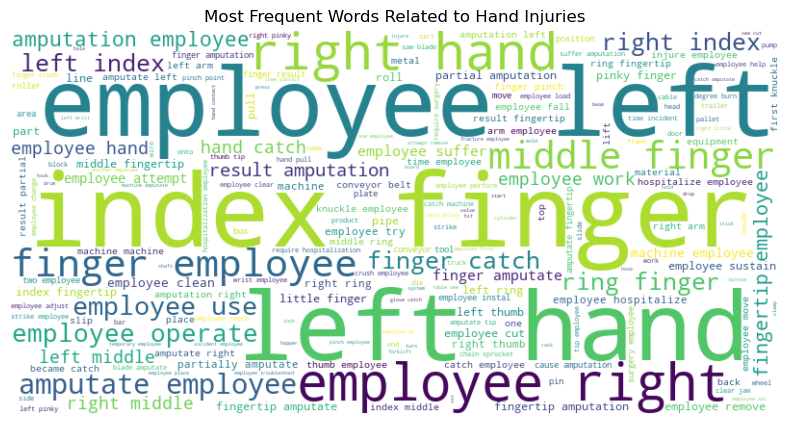

In [15]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(narratives)
keywords = tfidf_vectorizer.get_feature_names_out()

print("Top Keywords from TF-IDF:")
print(keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(narratives))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Words Related to Hand Injuries")
plt.axis("off")
plt.show()

Topic Modeling: Latent Dirichlet Allocation (LDA) to group common scenarios of hand injuries

Top Topics from LDA:
Topic 1: 0.088*"employee" + 0.058*"machine" + 0.047*"finger" + 0.034*"catch" + 0.029*"right" + 0.028*"hand" + 0.025*"amputate" + 0.022*"left" + 0.020*"fingertip" + 0.020*"amputation"
Topic 2: 0.092*"employee" + 0.026*"hand" + 0.024*"arm" + 0.022*"fall" + 0.015*"right" + 0.015*"left" + 0.013*"hospitalize" + 0.011*"break" + 0.011*"require" + 0.010*"fracture"
Topic 3: 0.085*"employee" + 0.040*"finger" + 0.021*"catch" + 0.021*"left" + 0.020*"pipe" + 0.017*"hand" + 0.016*"pinch" + 0.015*"lift" + 0.014*"amputate" + 0.014*"steel"
Topic 4: 0.089*"employee" + 0.052*"finger" + 0.035*"amputate" + 0.030*"left" + 0.027*"hand" + 0.025*"cut" + 0.024*"right" + 0.019*"press" + 0.019*"index" + 0.018*"saw"
Topic 5: 0.037*"employee" + 0.025*"valve" + 0.024*"pump" + 0.022*"air" + 0.018*"hose" + 0.017*"hopper" + 0.016*"release" + 0.016*"cart" + 0.015*"motor" + 0.015*"unit"


C:\Users\gupta\AppData\Local\Temp\ipykernel_39524\3851033950.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(5), y=avg_topic_weights, palette="viridis")


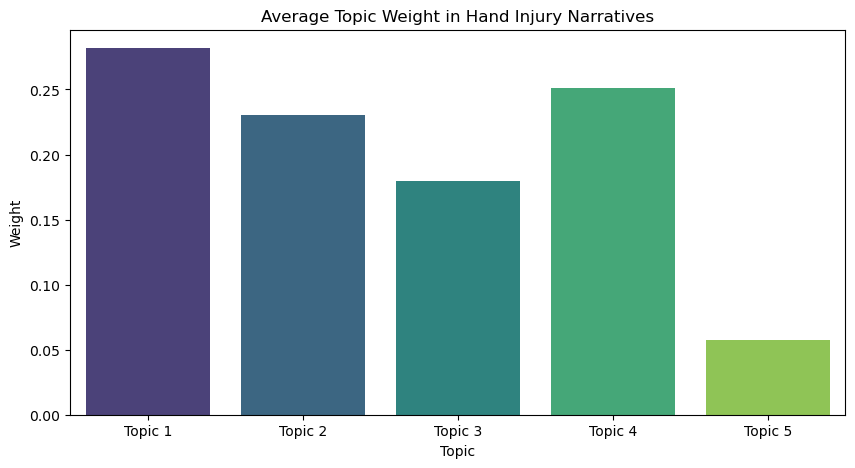

In [16]:
#Topic Modeling (LDA)
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
count_data = count_vectorizer.fit_transform(narratives)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in narratives])
corpus = [dictionary.doc2bow(text.split()) for text in narratives]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("Top Topics from LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

topics = [lda_model.get_document_topics(doc) for doc in corpus]

# Get topic weights across all documents
import numpy as np

topic_weights = []
for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_weights.append([prob for _, prob in topic_dist])

# Average weights per topic
avg_topic_weights = np.mean(topic_weights, axis=0)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(5), y=avg_topic_weights, palette="viridis")
plt.title("Average Topic Weight in Hand Injury Narratives")
plt.xlabel("Topic")
plt.ylabel("Weight")
plt.xticks(ticks=np.arange(5), labels=[f"Topic {i+1}" for i in range(5)])
plt.show()



Top Topics from LDA:
Topic 1: 0.084*"employee" + 0.077*"finger" + 0.047*"catch" + 0.035*"amputate" + 0.032*"right" + 0.030*"left" + 0.030*"amputation" + 0.027*"fingertip" + 0.024*"hand" + 0.022*"index"
Topic 2: 0.080*"employee" + 0.018*"hand" + 0.016*"pipe" + 0.015*"use" + 0.011*"lift" + 0.011*"left" + 0.011*"steel" + 0.010*"move" + 0.009*"finger" + 0.008*"truck"
Topic 3: 0.091*"employee" + 0.068*"machine" + 0.047*"finger" + 0.034*"amputate" + 0.030*"hand" + 0.027*"left" + 0.026*"right" + 0.022*"cut" + 0.018*"index" + 0.017*"operate"
Topic 4: 0.091*"employee" + 0.047*"arm" + 0.045*"fall" + 0.029*"fracture" + 0.027*"break" + 0.024*"require" + 0.023*"hospitalize" + 0.021*"surgery" + 0.020*"left" + 0.019*"foot"
Topic 5: 0.085*"employee" + 0.034*"hand" + 0.015*"burn" + 0.014*"right" + 0.013*"line" + 0.011*"valve" + 0.010*"pump" + 0.009*"air" + 0.009*"clean" + 0.009*"remove"


C:\Users\gupta\AppData\Local\Temp\ipykernel_39524\3173886683.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(5), y=avg_topic_weights, palette="viridis")


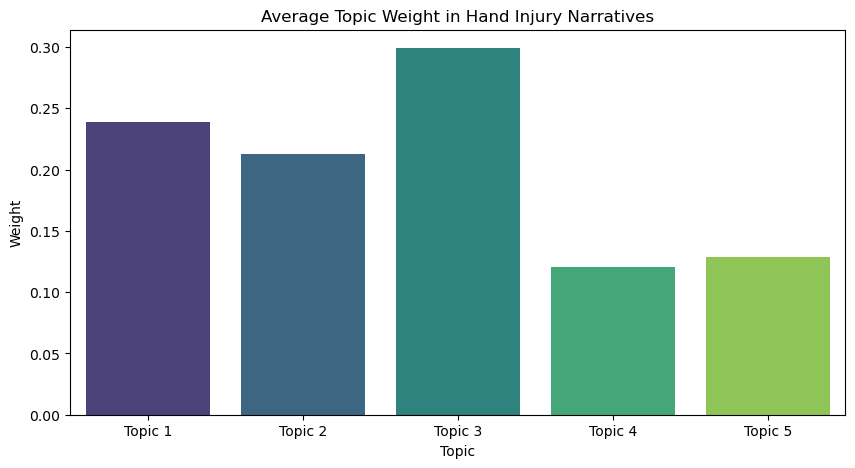

In [17]:
# Import the missing library
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Topic Modeling (LDA)
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
count_data = count_vectorizer.fit_transform(narratives)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary([text.split() for text in narratives])
corpus = [dictionary.doc2bow(text.split()) for text in narratives]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("Top Topics from LDA:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Get topic weights across all documents
topic_weights = []
for doc in corpus:
    topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_weights.append([prob for _, prob in topic_dist])

# Average weights per topic
avg_topic_weights = np.mean(topic_weights, axis=0)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(5), y=avg_topic_weights, palette="viridis")
plt.title("Average Topic Weight in Hand Injury Narratives")
plt.xlabel("Topic")
plt.ylabel("Weight")
plt.xticks(ticks=np.arange(5), labels=[f"Topic {i+1}" for i in range(5)])
plt.show()

Action Verb Analysis: Extract verbs that indicate how the injury occurred 

C:\Users\gupta\AppData\Local\Temp\ipykernel_39524\210535461.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verb_counts.values, y=verb_counts.index, palette='plasma', hue=None)


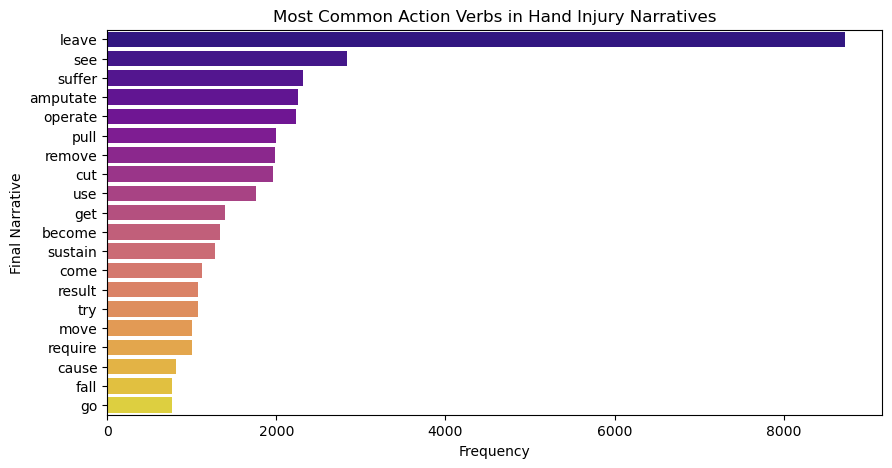

In [18]:
def extract_verbs(text):
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    return verbs

all_verbs = narratives.apply(extract_verbs).explode()
verb_counts = all_verbs.value_counts().head(20)

# Bar Chart of Action Verbs
plt.figure(figsize=(10, 5))
sns.barplot(x=verb_counts.values, y=verb_counts.index, palette='plasma', hue=None)
plt.title("Most Common Action Verbs in Hand Injury Narratives")
plt.xlabel("Frequency")
plt.show()


**Geospatial Analysis** to understand injury distribution based on location.

In [19]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px

# Drop rows with missing coordinates
geo_df = hand_injuries_df.dropna(subset=['Latitude', 'Longitude'])

Mapping Injury Locations (Interactive Map using Folium)

In [20]:

map_center = [geo_df['Latitude'].mean(), geo_df['Longitude'].mean()]
injury_map = folium.Map(location=map_center, zoom_start=5, tiles="OpenStreetMap")

# Add markers for each injury location
for _, row in geo_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Injury: {row['NatureTitle']} - {row['City']}, {row['State']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(injury_map)

# Display the map
injury_map.save("Injury_Locations.html")
print("Interactive Map saved as 'Injury_Locations.html'")

Interactive Map saved as 'Injury_Locations.html'


Heatmap of Injuries

In [21]:
heatmap = folium.Map(location=map_center, zoom_start=5)

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in geo_df.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=10).add_to(heatmap)

# Save the heatmap
heatmap.save("Injury_Heatmap.html")
print("Heatmap saved as 'Injury_Heatmap.html'")

Heatmap saved as 'Injury_Heatmap.html'


Cluster Analysis (using Folium's MarkerCluster)

In [22]:
cluster_map = folium.Map(location=map_center, zoom_start=5)
marker_cluster = MarkerCluster().add_to(cluster_map)

for _, row in geo_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Injury: {row['NatureTitle']} - {row['City']}, {row['State']}",
        icon=folium.Icon(color="blue", icon="wrench")
    ).add_to(marker_cluster)

cluster_map.save("Injury_Clusters.html")
print("Cluster Map saved as 'Injury_Clusters.html'")

Cluster Map saved as 'Injury_Clusters.html'


**Time Series Analysis: Identify trends and seasonality**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [24]:
# Convert the 'EventDate' column to datetime format
hand_injuries_df['EventDate'] = pd.to_datetime(hand_injuries_df['EventDate'])

# Extract year and month for seasonality analysis
hand_injuries_df['Year'] = hand_injuries_df['EventDate'].dt.year
hand_injuries_df['Month'] = hand_injuries_df['EventDate'].dt.month

Time Series Plot

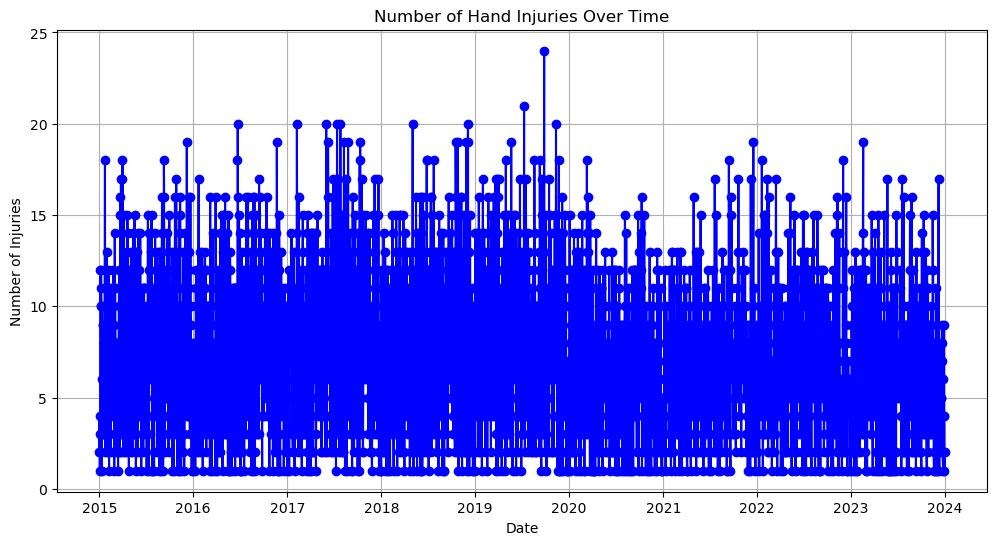

In [25]:
# Group by date and count occurrences
time_series = hand_injuries_df.groupby('EventDate').size()

# Plotting the number of injuries over time
plt.figure(figsize=(12, 6))
plt.plot(time_series, marker='o', linestyle='-', color='b')
plt.title('Number of Hand Injuries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.show()

Trend Analysis using Moving Averages

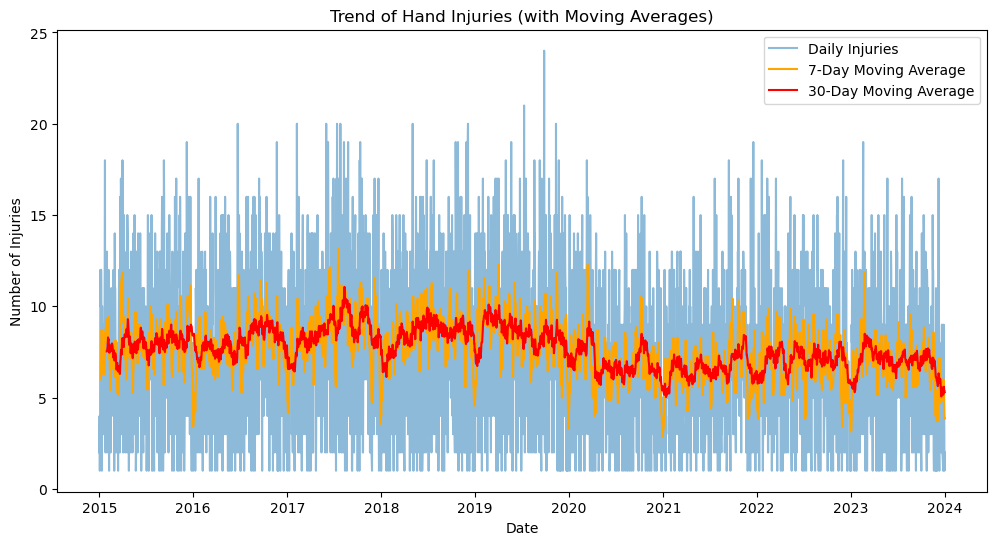

In [26]:
# Calculating moving averages (7-day and 30-day)
time_series_7d = time_series.rolling(window=7).mean()
time_series_30d = time_series.rolling(window=30).mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Daily Injuries', alpha=0.5)
plt.plot(time_series_7d, label='7-Day Moving Average', color='orange')
plt.plot(time_series_30d, label='30-Day Moving Average', color='red')
plt.title('Trend of Hand Injuries (with Moving Averages)')
plt.xlabel('Date')
plt.ylabel('Number of Injuries')
plt.legend()
plt.show()

Seasonality Analysis (Monthly Trends)

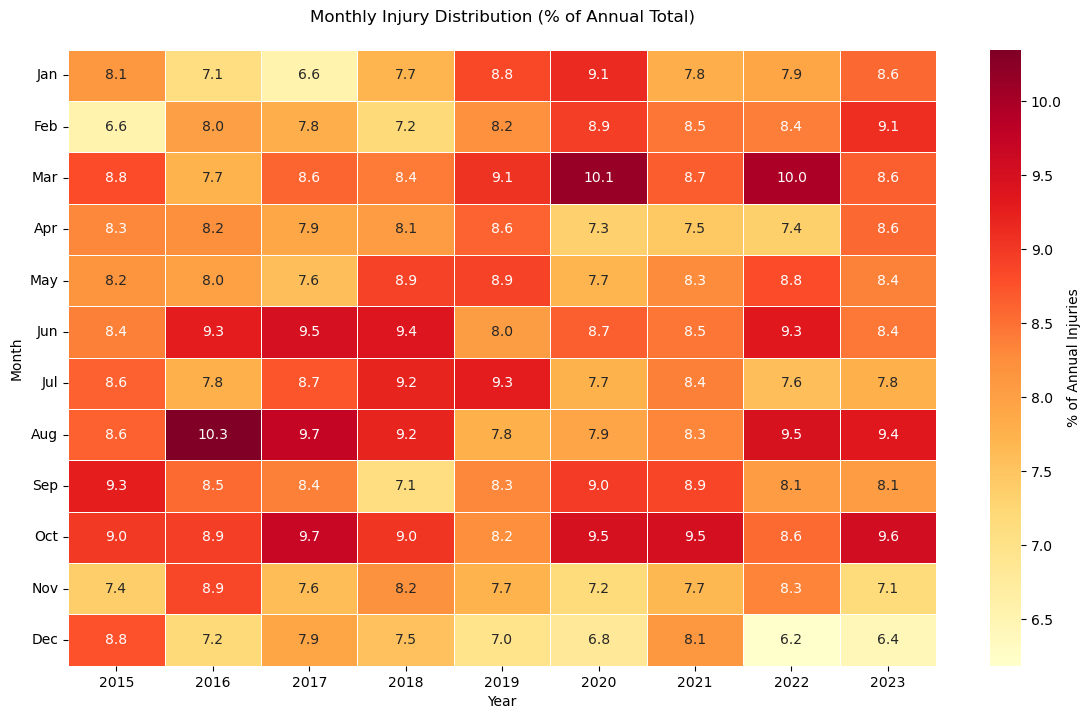

In [27]:
# Group injuries by year and month
# Filter for recent valid years (2015-2024)
valid_years = hand_injuries_df[hand_injuries_df['Year'].between(2015, 2024)]
monthly_counts = valid_years.groupby(['Year', 'Month']).size().unstack()

# Normalize for comparison across years
normalized_monthly = monthly_counts.div(monthly_counts.sum(axis=1), axis=0)

plt.figure(figsize=(14, 8))
sns.heatmap(
    normalized_monthly.T * 100,  # Convert to percentages
    annot=True, 
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': '% of Annual Injuries'}
)
plt.title("Monthly Injury Distribution (% of Annual Total)", pad=20)
plt.xlabel("Year")
plt.ylabel("Month")
plt.yticks(ticks=np.arange(12)+0.5, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.show()